<h4>Installing Dependencies</h4>

In [2]:
#!pip install mss pydirectinput pytesseract

In [4]:
#!pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/38/d2/3e8c13ffc37ca5ebc6f382b242b44acb43eb489042e1728407ac3904e72f/opencv_python-4.8.1.78-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.1 MB 871.5 kB/s eta 0:00:44
   ---------------------------------------- 0.1/38.1 MB 871.5 kB/s eta 0:00:44
   ---------------------------------------- 0.1/38.1 MB 871.5 kB/s eta 0:00:44
   ---------------------------------------- 0.1/38.1 MB 871.5 kB/s eta 0:00:44
   ---------------------------------------- 0.1/38.1 MB 871.5 kB/s eta 0:00:44
   ---------------------------------------- 0.1/38.1 MB 312.2 kB/s eta 0:02:02
   ---------------------------------------- 0.1/38.1 MB 300.4 kB/s eta 0:02:07
   -------------

In [6]:
#!pip install gym

     ---------------------------------------- 0.0/721.7 kB ? eta -:--:--
     - -------------------------------------- 30.7/721.7 kB ? eta -:--:--
     - -------------------------------------- 30.7/721.7 kB ? eta -:--:--
     - -------------------------------------- 30.7/721.7 kB ? eta -:--:--
     - -------------------------------------- 30.7/721.7 kB ? eta -:--:--
     - -------------------------------------- 30.7/721.7 kB ? eta -:--:--
     - -------------------------------------- 30.7/721.7 kB ? eta -:--:--
     ---- -------------------------------- 92.2/721.7 kB 291.5 kB/s eta 0:00:03
     ---- -------------------------------- 92.2/721.7 kB 291.5 kB/s eta 0:00:03
     ---- -------------------------------- 92.2/721.7 kB 291.5 kB/s eta 0:00:03
     ---- -------------------------------- 92.2/721.7 kB 291.5 kB/s eta 0:00:03
     ----- ------------------------------ 112.6/721.7 kB 204.8 kB/s eta 0:00:03
     ----- ------------------------------ 112.6/721.7 kB 204.8 kB/s eta 0:00:03
   

In [1]:
#chrome://dino/
from mss import mss #used for screen capture
import pydirectinput #use to pass commands to the game such as click
import cv2
import numpy as np
import pytesseract #OCR to check when the game is over
from matplotlib import pyplot as plt
import time
#Environment components
from gym import Env
from gym.spaces import Box, Discrete

## Building the environment

In [37]:
class WebGame(Env):
    def __init__(self):
        super().__init__() #subclass model
        # Setup spaces
        self.observation_space = Box(low=0, high=255, shape=(1,83,100), dtype=np.uint8)
        self.action_space = Discrete(3)
        # Designing extraction parameters for the game
        self.cap = mss()
        self.game_location = {'top': 300, 'left': 0, 'width': 600, 'height': 500}
        self.done_location = {'top': 300, 'left': 0, 'width': 600, 'height': 500}
        #self.done_location = {'top': 405, 'left': 630, 'width': 660, 'height': 70}

    def step(self, action): #Step is what is called to do something in the game
        action_map = {
            0:"space",#jump
            1:"down",#Down
            2:"no_op"#No action
        }
        
        if action != 2:
            pydirectinput.press(action_map[action])
            
        done, done_cap = self.get_done() #Check whether the game is done
        new_observation = self.get_observation() # Check the next observation
        
        #For every frame that is alive, give it a reward
        reward = 1
        #Info dictionary to store information
        info = {}
            
        return new_observation, reward, info, done
    
    def render(self):#Rendering the game
        cv2.imshow("Game", np.array(self.cap.grab(self.game_location))[:,:,:3])
        if cv2.waitKey(1) & 0xFF == ord('q'):
            self.close()
    
    def close(self): #Closes down the game
        cv2.destroyAllWindows()
    
    def restart(self):#Restart the game
        time.sleep(1)
        pydirectinput.click(x=300, y=200)
        pydirectinput.press('space')
        return self.get_observation()
    
    def get_observation(self): #Getting the part of the game that we want
        #Get screen capture of game
        raw = np.array(self.cap.grab(self.game_location))[:,:,:3].astype(np.uint8)
        gray = cv2.cvtColor(raw, cv2.COLOR_BGR2GRAY)
        resized = cv2.resize(gray, (100, 83))
        channel = np.reshape(resized, (1, 83, 100))
        return channel
    
    def get_done(self): #Get the done text. Check whether the game is over using OCR
        done_cap = np.array(self.cap.grab(self.done_location))[:,:,:3]
        done_strings = ['GAME', 'GAHE']
        
        #Starting using OCR
        done = False
        pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
        res = pytesseract.image_to_string(done_cap)[:4]
        if res in done_strings:
            done = True
        return done, done_cap

In [38]:
env = WebGame()

In [39]:
env.reset()

In [40]:
env.close()

In [41]:
env.render()

In [42]:
env.close()

In [43]:
env.restart()

array([[[89, 33, 33, ..., 33, 33, 33],
        [89, 33, 33, ..., 33, 33, 33],
        [89, 33, 33, ..., 33, 33, 33],
        ...,
        [92, 33, 33, ..., 33, 33, 33],
        [92, 33, 33, ..., 33, 33, 33],
        [92, 33, 33, ..., 33, 33, 33]]], dtype=uint8)

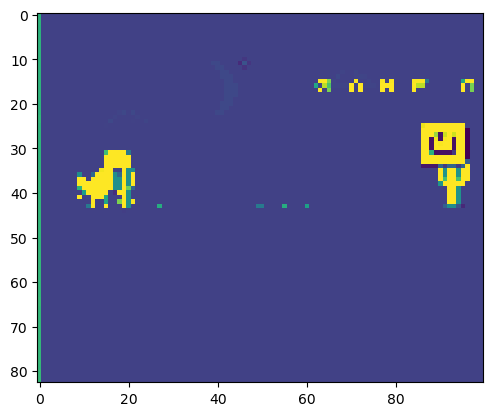

In [44]:
plt.imshow(env.get_observation()[0])

In [45]:
done, done_cap = env.get_done()
done

True

In [46]:
#res

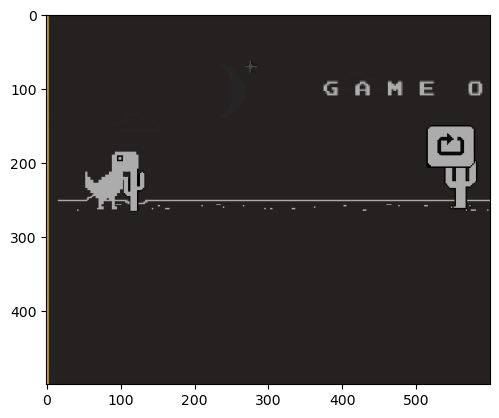

In [47]:
plt.imshow(done_cap)

### Testing Code to run game

In [48]:
env = WebGame()

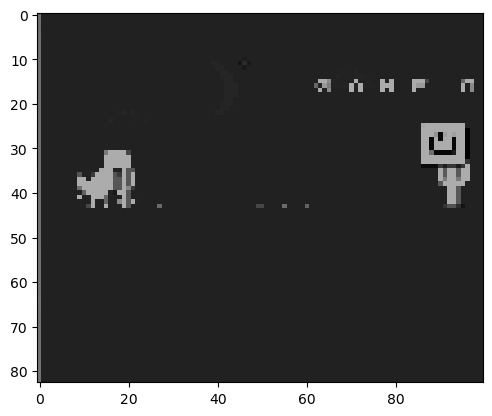

In [49]:
obs = env.get_observation()
plt.imshow(cv2.cvtColor(obs[0], cv2.COLOR_BGR2RGB))

In [50]:
done, done_cap = env.get_done()
print(done)

True


In [51]:
env.reset()

#### Writing for loop to play games by itself

In [53]:
for episode in range(10):
    obs = env.reset()
    done = False
    total_reward = 0
    
    while not done:
        obs, reward, done, info = env.step(env.action_space.sample())
        total_reward += reward
    print(f'Total reward for episode: {episode} is: {total_reward}')

Total reward for episode: 0 is: 0
Total reward for episode: 1 is: 0
Total reward for episode: 2 is: 0
Total reward for episode: 3 is: 0
Total reward for episode: 4 is: 0
Total reward for episode: 5 is: 0
Total reward for episode: 6 is: 0
Total reward for episode: 7 is: 0
Total reward for episode: 8 is: 0
Total reward for episode: 9 is: 0


# Reinforcement Learning

### Building Callback

In [61]:
import os #importing os for file path management
from stable_baselines3.common.callbacks import BaseCallback #import Basecallback for saving models
from stable_baselines3.common import env_checker # Environment checker

In [63]:
# env_checker.check_env(env)

In [64]:
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [65]:
CHECKPOINT_DIR = './train/'
LOG_DIR = './logs/'

In [66]:
callback = TrainAndLoggingCallback(check_freq=1000, save_path=CHECKPOINT_DIR)

### Build DQN and Train

In [67]:
from stable_baselines3 import DQN
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.vec_env import DummyVecEnv, VecFrameStack

In [68]:
env = WebGame()

In [71]:
# Creating the DQN moidel
# model = DQN('CnnPolicy', env, tensorboard_log=LOG_DIR, verbose=1, buffer_size=1200000, learning_starts=1000)

In [72]:
# model.learn(total_timesteps=100000, callback=callback)

In [73]:
# model.load('train_first/best_mode l_50000') 

#### Testing the model

In [75]:
# for episode in range(5): 
#     obs = env.reset()
#     done = False
#     total_reward = 0
#     while not done: 
#         action, _ = model.predict(obs)
#         obs, reward, done, info = env.step(int(action))
#         time.sleep(0.01)
#         total_reward += reward
#     print('Total Reward for episode {} is {}'.format(episode, total_reward))
#     time.sleep(2)